In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

**Target Variable (What you want to predict):**

**Education Quality Score:** You can create a composite score or metric that represents the overall quality of education in a specific region, school, or institution. This score can be derived from standardized test scores, graduation rates, student performance metrics, or other relevant indicators.

**Independent Variables (Factors that may influence education quality):**
You can select a combination of variables from your dataset to serve as independent variables. Here are some possibilities:

**1. Government Expenditure on Education**:

Government expenditure on education, total (% of GDP)
Government expenditure on education, total (% of government expenditure)
Current education expenditure, primary/secondary/tertiary (% of total expenditure in public institutions)

**2. Enrollment and Attendance:**

Gross enrollment ratio in primary and secondary education
Net enrollment rate, primary (% of primary school age children)
School enrollment, primary/secondary/tertiary (% gross or net)

**3. Teacher Qualifications:**

Teacher qualifications (e.g., percentage of teachers with tertiary education)
Teacher-to-student ratio

**4. Literacy and Illiteracy Rates:**

Literacy rate, adult total (% of people ages 15 and above)
Adult illiterate population, 15+ years, both sexes (number)

**5. Expenditure on Specific Education Levels:**

Expenditure on primary/secondary/tertiary education (% of government expenditure on education)

**6. Gender-Related Factors:**

Gender-specific enrollment ratios
Gender parity index (GPI) for various education levels

**7. School Infrastructure and Facilities:**

Availability of libraries, computers, and other educational resources
School infrastructure conditions

**8. Teacher Quality and Training:**

Professional development opportunities for teachers
Teacher certification and training programs

**9. Student Performance and Outcomes:**

Student test scores and achievement data
Graduation rates

**10. Socioeconomic Indicators:**

GDP per capita
Unemployment rates
Labor force statistics

**11. Health and Well-being Factors:**

Access to healthcare and nutrition
Immunization rates

**12. Demographic Factors:**

Population in thousands, age 15+, total

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_idn = pd.read_csv('/content/drive/MyDrive/Datathon/education_idn.csv').iloc[1:]
df_cam = pd.read_csv('/content/drive/MyDrive/Datathon/education_khm.csv').iloc[1:]
df_lao = pd.read_csv('/content/drive/MyDrive/Datathon/education_lao.csv').iloc[1:]
df_mys = pd.read_csv('/content/drive/MyDrive/Datathon/education_mys.csv').iloc[1:]
df_phl = pd.read_csv('/content/drive/MyDrive/Datathon/education_phl.csv').iloc[1:]
df_tha = pd.read_csv('/content/drive/MyDrive/Datathon/education_tha.csv').iloc[1:]
df_vie = pd.read_csv('/content/drive/MyDrive/Datathon/education_vnm.csv').iloc[1:]
df_sgp = pd.read_csv('/content/drive/MyDrive/Datathon/education_sgp.csv').iloc[1:]
df_brn = pd.read_csv('/content/drive/MyDrive/Datathon/education_brn.csv').iloc[1:]
df_mmr = pd.read_csv('/content/drive/MyDrive/Datathon/education_mmr.csv').iloc[1:]

df_all = pd.concat([df_idn, df_cam, df_lao, df_mys, df_phl, df_tha, df_vie, df_sgp, df_brn, df_mmr], ignore_index=True)
df_all.shape

(147508, 6)

In [4]:
df_all

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Indonesia,IDN,2010,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,0.92
1,Indonesia,IDN,2005,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,4.65
2,Indonesia,IDN,2000,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,7.67
3,Indonesia,IDN,1995,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,7.58
4,Indonesia,IDN,1990,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,17.13
...,...,...,...,...,...,...
147503,Myanmar,MMR,1977,"Number of under-five deaths, male",SH.DTH.MORT.MA,87993
147504,Myanmar,MMR,1976,"Number of under-five deaths, male",SH.DTH.MORT.MA,89128
147505,Myanmar,MMR,1975,"Number of under-five deaths, male",SH.DTH.MORT.MA,90345
147506,Myanmar,MMR,1974,"Number of under-five deaths, male",SH.DTH.MORT.MA,91634


In [ ]:
df_all['Year'].sort_values(ascending=False).unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983',
       '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975',
       '1974', '1973', '1972', '1971', '1970', '1969', '1968', '1967',
       '1966', '1965', '1964', '1963', '1962', '1961', '1960'],
      dtype=object)

In [ ]:
df_all['Country Name'].unique()

array(['Indonesia', 'Cambodia', 'Lao PDR', 'Malaysia', 'Philippines',
       'Thailand', 'Vietnam', 'Singapore', 'Brunei Darussalam', 'Myanmar'],
      dtype=object)

In [ ]:
df_all['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       'Barro-Lee: Percentage of population age 15+ with no education',
       'Barro-Lee: Percentage of female population age 20-24 with no education',
       'Barro-Lee: Percentage of population age 20-24 with no education',
       'Barro-Lee: Percentage of female population age 25-29 with no education',
       'Barro-Lee: Percentage of population age 25-29 with no education',
       'Barro-Lee: Percentage of female population age 25+ with no education',
       'Barro-Lee: Percentage of population age 25+ with no education',
       'Barro-Lee: Percentage of female population age 30-34 with no education',
       'Barro-Lee: Percentage of population age 30-34 with no education',
       'Barro-Lee: Percentage of female population age 35-39 with no education

In [7]:
set_idn = set(df_idn['Indicator Name'].unique())
set_cam = set(df_cam['Indicator Name'].unique())
set_lao = set(df_lao['Indicator Name'].unique())
set_mys = set(df_mys['Indicator Name'].unique())
set_phl = set(df_phl['Indicator Name'].unique())
set_tha = set(df_tha['Indicator Name'].unique())
set_vie = set(df_vie['Indicator Name'].unique())
set_sgp = set(df_sgp['Indicator Name'].unique())
set_brn = set(df_brn['Indicator Name'].unique())
set_mmr = set(df_mmr['Indicator Name'].unique())

all_sets = [set_idn, set_cam, set_lao, set_mys, set_phl, set_tha, set_vie, set_sgp, set_brn, set_mmr]

# Find the common elements among all sets
common_elements = set.intersection(*all_sets)
common_elements = list(common_elements)
common_elements.sort()
common_elements

['Adjusted net enrollment rate, primary (% of primary school age children)',
 'Adolescents out of school (% of lower secondary school age)',
 'Adult illiterate population, 15+ years, % female',
 'Adult illiterate population, 15+ years, both sexes (number)',
 'Adult illiterate population, 15+ years, female (number)',
 'Adult illiterate population, 15+ years, male (number)',
 'Barro-Lee: Average years of primary schooling, age 15+, female',
 'Barro-Lee: Average years of primary schooling, age 15+, total',
 'Barro-Lee: Average years of primary schooling, age 15-19, female',
 'Barro-Lee: Average years of primary schooling, age 15-19, total',
 'Barro-Lee: Average years of primary schooling, age 20-24, female',
 'Barro-Lee: Average years of primary schooling, age 20-24, total',
 'Barro-Lee: Average years of primary schooling, age 25+, female',
 'Barro-Lee: Average years of primary schooling, age 25+, total',
 'Barro-Lee: Average years of primary schooling, age 25-29, female',
 'Barro-Lee: Av

In [ ]:
len(common_elements)

737

In [ ]:
test = df_all.groupby('Indicator Name').size().reset_index(name='count').sort_values(by='count', ascending=False)
test = test[test['count'] >= 40]
test

,Indicator Name,count
489,Population ages 15-64 (% of total population),630
488,Population ages 0-14 (% of total population),630
429,"Number of infant deaths, female",571
430,"Number of infant deaths, male",571
431,"Number of under-five deaths, female",555
...,...,...
348,"Enrolment in tertiary education, ISCED 7 progr...",49
896,"Trained teachers in upper secondary education,...",48
373,Female share of graduates in unknown or unspec...,48
897,"Trained teachers in upper secondary education,...",48


In [ ]:
columns = [i for i in test['Indicator Name'].values if i in common_elements]
len(columns)

737

In [ ]:
columns

['Population ages 15-64 (% of total population)',
 'Population ages 0-14 (% of total population)',
 'Number of infant deaths, female',
 'Number of infant deaths, male',
 'Number of under-five deaths, female',
 'Number of under-five deaths, male',
 'Primary school starting age (years)',
 'Secondary education, duration (years)',
 'Primary education, duration (years)',
 'Lower secondary school starting age (years)',
 'Theoretical duration of upper secondary education (years)',
 'Theoretical duration of lower secondary education (years)',
 'Official entrance age to upper secondary education (years)',
 'Population of the official entrance age to primary education, female (number)',
 'Population of the official entrance age to primary education, both sexes (number)',
 'School age population, upper secondary education, male (number)',
 'School age population, upper secondary education, female (number)',
 'School age population, upper secondary education, both sexes (number)',
 'Population of 

# **Percentage of female population age 15+ with no education**

In [ ]:
# Filter the DataFrame for the specific indicator and years
indicator_name = 'Barro-Lee: Percentage of female population age 15+ with no education'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
18,Indonesia,IDN,2010,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,10.54
20,Indonesia,IDN,2000,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,26.07
22,Indonesia,IDN,1990,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,50.1
24,Indonesia,IDN,1980,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,42.08
26,Indonesia,IDN,1970,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,57.68
16255,Cambodia,KHM,2010,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,29.24
16257,Cambodia,KHM,2000,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,43.81
16259,Cambodia,KHM,1990,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,54.25
16261,Cambodia,KHM,1980,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,63.93
16263,Cambodia,KHM,1970,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,78.71


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1970,1980,1990,2000,2010
Country Name,,,,,
Brunei Darussalam,56.93,37.05,28.57,23.22,22.23
Cambodia,78.71,63.93,54.25,43.81,29.24
Indonesia,57.68,42.08,50.1,26.07,10.54
Lao PDR,78.7,68.05,56.92,47.14,38.64
Malaysia,51.13,34.45,20.33,15.11,9.25
Myanmar,75.84,60.95,46.09,33.53,23.71
Philippines,18.17,9.79,5.73,5.7,2.76
Singapore,47.47,37.37,15.35,23.95,18.57
Thailand,32.31,18.39,13.57,14.54,3.82


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1970    float64
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

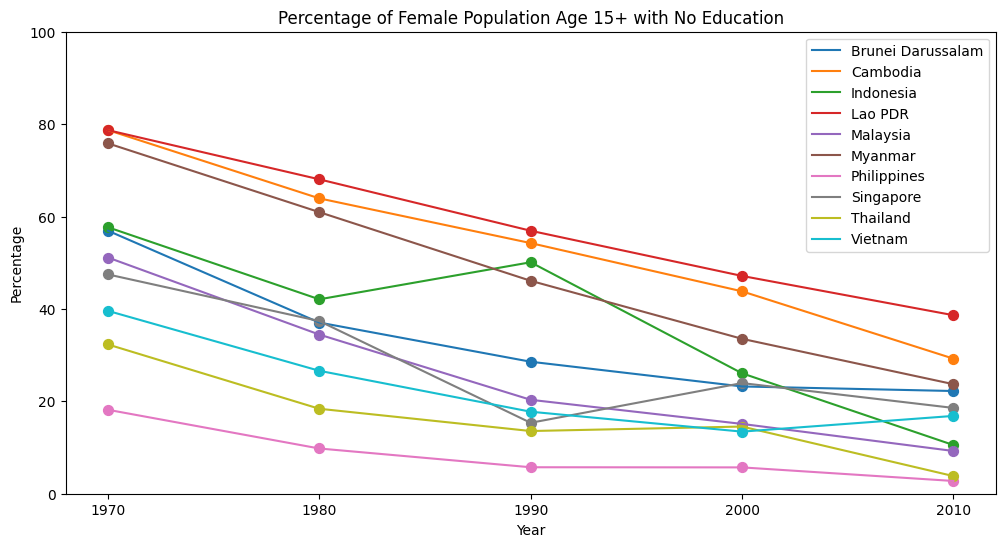

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Female Population Age 15+ with No Education')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Percentage of female population age 15+ with primary schooling. Completed Primary**

In [ ]:
indicator_name = 'Barro-Lee: Percentage of female population age 15+ with primary schooling. Completed Primary'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
450,Indonesia,IDN,2010,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,29.25
452,Indonesia,IDN,2000,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,33.78
454,Indonesia,IDN,1990,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,14.63
456,Indonesia,IDN,1980,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,16.61
458,Indonesia,IDN,1970,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,15.65
16687,Cambodia,KHM,2010,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,21.46
16689,Cambodia,KHM,2000,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,14.06
16691,Cambodia,KHM,1990,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,9.99
16693,Cambodia,KHM,1980,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,6.49
16695,Cambodia,KHM,1970,Barro-Lee: Percentage of female population age...,BAR.PRM.CMPT.15UP.FE.ZS,4.24


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1970,1980,1990,2000,2010
Country Name,,,,,
Brunei Darussalam,8.07,12,11.71,13.69,11.13
Cambodia,4.24,6.49,9.99,14.06,21.46
Indonesia,15.65,16.61,14.63,33.78,29.25
Lao PDR,7.35,12.38,17.94,19.49,21.78
Malaysia,15.31,19.64,14.77,13.68,11.33
Myanmar,6.91,12.83,22.09,28.94,35.16
Philippines,20.25,24.11,23.33,20.97,18.67
Singapore,9.56,16.03,24.3,6.57,4.63
Thailand,9.63,3.18,15.44,18.57,27.83


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1970    float64
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

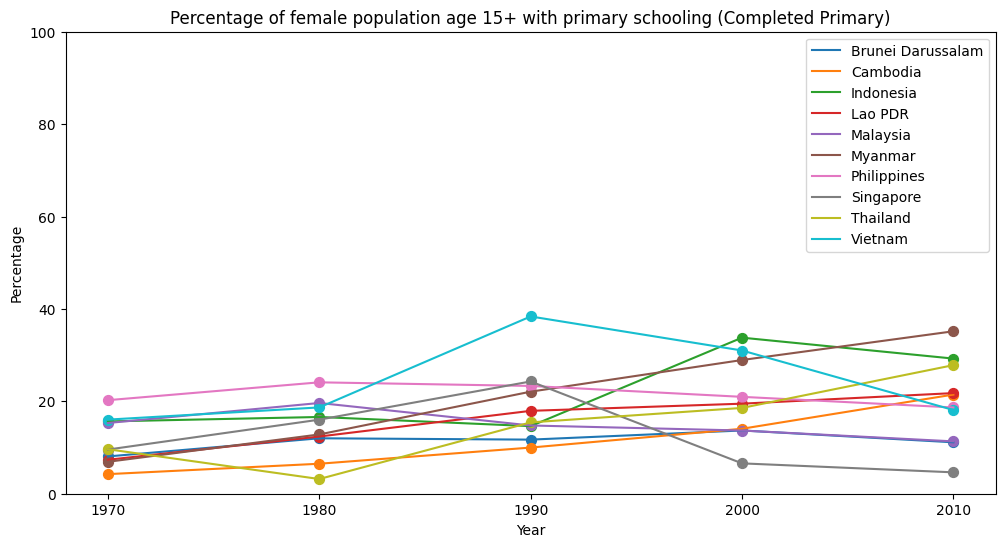

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of female population age 15+ with primary schooling (Completed Primary)')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Percentage of female population age 15+ with secondary schooling (Completed Secondary)**

In [ ]:
indicator_name = 'Barro-Lee: Percentage of female population age 15+ with secondary schooling. Completed Secondary'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1314,Indonesia,IDN,2010,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,19.37
1316,Indonesia,IDN,2000,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,8.22
1318,Indonesia,IDN,1990,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,8.71
1320,Indonesia,IDN,1980,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,3.48
1322,Indonesia,IDN,1970,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,1.29
17551,Cambodia,KHM,2010,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,3.02
17553,Cambodia,KHM,2000,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,1.36
17555,Cambodia,KHM,1990,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,0.97
17557,Cambodia,KHM,1980,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,0.55
17559,Cambodia,KHM,1970,Barro-Lee: Percentage of female population age...,BAR.SEC.CMPT.15UP.FE.ZS,0.23


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1970,1980,1990,2000,2010
Country Name,,,,,
Brunei Darussalam,8.67,15.28,23.52,27.04,30.51
Cambodia,0.23,0.55,0.97,1.36,3.02
Indonesia,1.29,3.48,8.71,8.22,19.37
Lao PDR,0.87,1.18,1.59,3.91,5.32
Malaysia,4.13,10.2,16.59,34.37,39.54
Myanmar,1.84,3.82,7.97,10.89,16.28
Philippines,8.24,11.86,16.3,18.07,24.9
Singapore,9.55,8.49,10.13,38.46,29.21
Thailand,1.63,3.77,6.21,10.47,17.43


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1970    float64
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

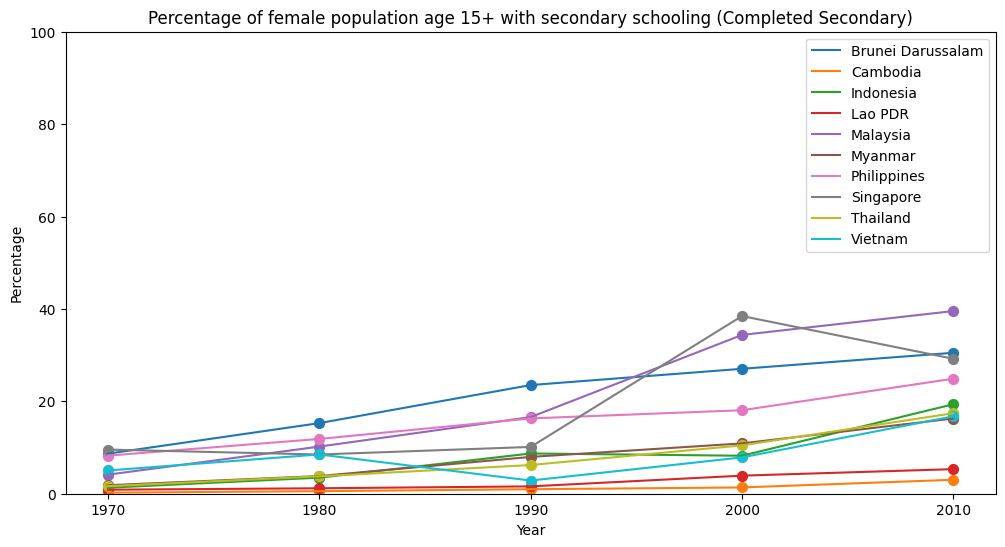

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of female population age 15+ with secondary schooling (Completed Secondary)')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Percentage of female population age 15+ with tertiary schooling (Completed Tertiary)**

In [ ]:
indicator_name = 'Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Completed Tertiary'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1962,Indonesia,IDN,2010,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,3.57
1964,Indonesia,IDN,2000,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.91
1966,Indonesia,IDN,1990,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.66
1968,Indonesia,IDN,1980,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.11
1970,Indonesia,IDN,1970,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.07
18199,Cambodia,KHM,2010,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.86
18201,Cambodia,KHM,2000,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.09
18203,Cambodia,KHM,1990,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.08
18205,Cambodia,KHM,1980,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.05
18207,Cambodia,KHM,1970,Barro-Lee: Percentage of female population age...,BAR.TER.CMPT.15UP.FE.ZS,0.03


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1970,1980,1990,2000,2010
Country Name,,,,,
Brunei Darussalam,0.62,2.75,3.2,4.55,6.33
Cambodia,0.03,0.05,0.08,0.09,0.86
Indonesia,0.07,0.11,0.66,0.91,3.57
Lao PDR,0.15,0.46,1.13,1.45,3.34
Malaysia,0.4,0.72,1.74,2.66,5.08
Myanmar,0.08,0.48,1.01,1.71,2.87
Philippines,7.75,8.87,7.04,7.57,6.55
Singapore,0.7,1.72,2.78,12.59,27.87
Thailand,0.44,2.44,4.41,4.81,11.65


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1970    float64
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

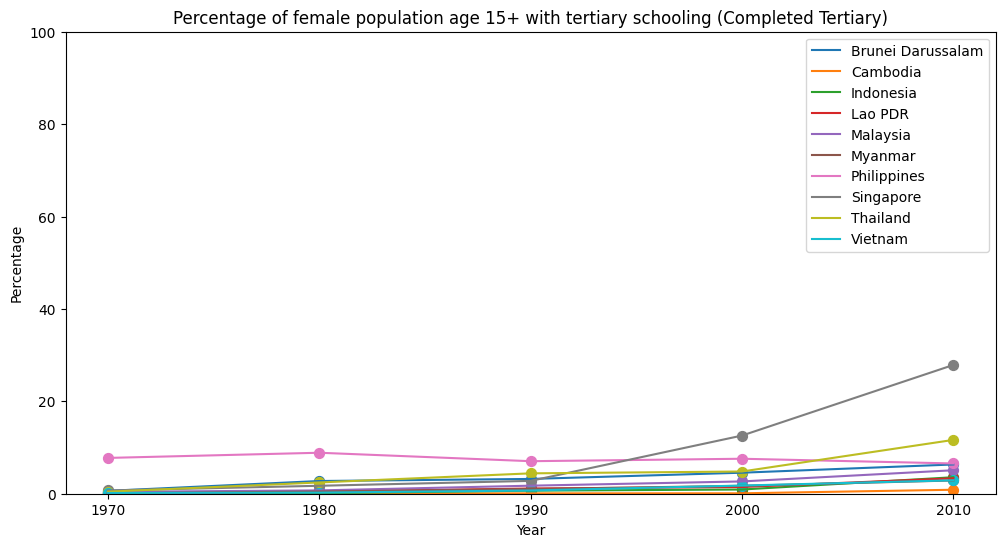

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of female population age 15+ with tertiary schooling (Completed Tertiary)')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Gross enrolment ratio, primary to tertiary, female (%)**

In [ ]:
indicator_name = 'Gross enrolment ratio, primary to tertiary, female (%)'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
9655,Indonesia,IDN,2010,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,73.99386
9664,Indonesia,IDN,2000,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,61.49035
9674,Indonesia,IDN,1970,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,38.65659
25368,Cambodia,KHM,2000,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,46.46896
40033,Lao PDR,LAO,2010,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,58.02354
40043,Lao PDR,LAO,2000,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,47.96444
40051,Lao PDR,LAO,1990,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,38.57029
40055,Lao PDR,LAO,1980,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,40.40445
56784,Malaysia,MYS,2010,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,76.83488
56794,Malaysia,MYS,2000,"Gross enrolment ratio, primary to tertiary, fe...",UIS.GER.1T6.F,74.05179


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1970,1980,1990,2000,2010
Country Name,,,,,
Brunei Darussalam,NaN,NaN,NaN,73.22203,78.74891
Cambodia,NaN,NaN,NaN,46.46896,NaN
Indonesia,38.65659,NaN,NaN,61.49035,73.99386
Lao PDR,NaN,40.40445,38.57029,47.96444,58.02354
Malaysia,NaN,55.76465,NaN,74.05179,76.83488
Thailand,NaN,NaN,NaN,NaN,80.24049


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1970    float64
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

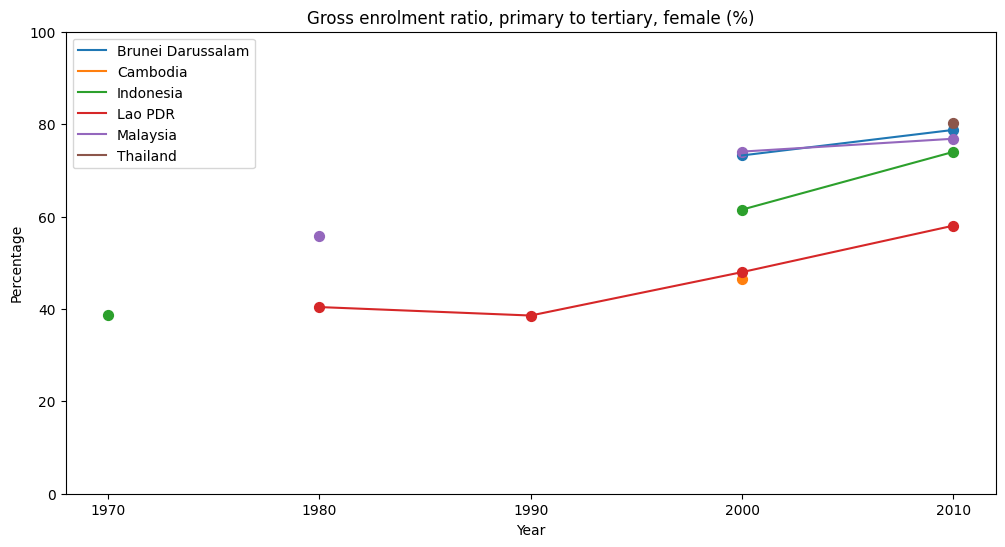

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Gross enrolment ratio, primary to tertiary, female (%)')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Repetition rate in Grade 1 of primary education, female (%)**

In [ ]:
indicator_name = 'Repetition rate in Grade 1 of primary education, female (%)'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
10696,Indonesia,IDN,2010,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,3.7676
26102,Cambodia,KHM,2010,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,12.10915
26112,Cambodia,KHM,2000,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,28.5685
41124,Lao PDR,LAO,2010,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,24.70604
41134,Lao PDR,LAO,2000,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,33.49358
57363,Malaysia,MYS,1990,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,0
57372,Malaysia,MYS,1980,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,0
87947,Thailand,THA,2000,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,9.87101
101683,Vietnam,VNM,2000,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,4.98958
128472,Brunei Darussalam,BRN,2010,Repetition rate in Grade 1 of primary educatio...,UIS.REPR.1.G1.F,0.02927


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1980,1990,2000,2010
Country Name,,,,
Brunei Darussalam,8.5703,NaN,NaN,0.02927
Cambodia,NaN,NaN,28.5685,12.10915
Indonesia,NaN,NaN,NaN,3.7676
Lao PDR,NaN,NaN,33.49358,24.70604
Malaysia,0,0,NaN,NaN
Myanmar,NaN,NaN,1.23064,NaN
Thailand,NaN,NaN,9.87101,NaN
Vietnam,NaN,NaN,4.98958,NaN


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

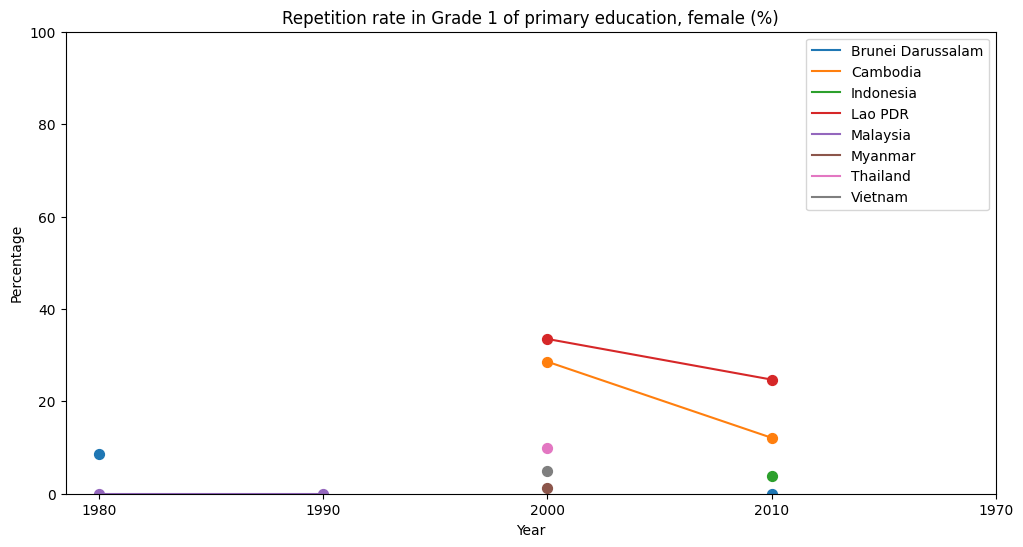

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Repetition rate in Grade 1 of primary education, female (%)')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Adult illiterate population, 15+ years, % female**

In [ ]:
indicator_name = 'Adult illiterate population, 15+ years, % female'
years_of_interest = ['1970', '1980', '1990', '2000', '2010']

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
9888,Indonesia,IDN,1990,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,67.57023
9889,Indonesia,IDN,1980,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,65.74772
40279,Lao PDR,LAO,2000,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,69.80604
56985,Malaysia,MYS,2010,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,65.49772
56986,Malaysia,MYS,2000,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,63.88195
56988,Malaysia,MYS,1980,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,63.87595
72337,Philippines,PHL,2000,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,49.76172
72339,Philippines,PHL,1990,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,52.9685
72340,Philippines,PHL,1980,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,51.52071
87602,Thailand,THA,2010,"Adult illiterate population, 15+ years, % female",UIS.LPP.AG15T99,51.60042


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,1980,1990,2000,2010
Country Name,,,,
Indonesia,65.74772,67.57023,NaN,NaN
Lao PDR,NaN,NaN,69.80604,NaN
Malaysia,63.87595,NaN,63.88195,65.49772
Myanmar,NaN,NaN,71.07942,NaN
Philippines,51.52071,52.9685,49.76172,NaN
Singapore,74.96114,77.64988,75.90957,74.341
Thailand,67.77956,NaN,66.07693,51.60042
Vietnam,NaN,NaN,69.9133,NaN


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
1980    float64
1990    float64
2000    float64
2010    float64
dtype: object

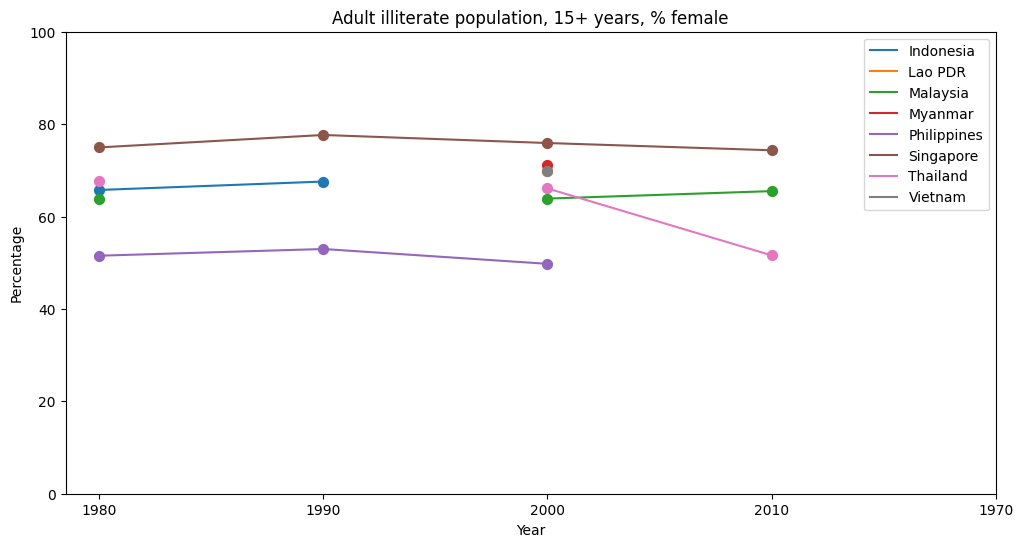

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Adult illiterate population, 15+ years, % female')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.ylim(0, 100)
plt.show()

# **Unemployment, female (% of female labor force) (modeled ILO estimate)**

In [ ]:
indicator_name = 'Unemployment, female (% of female labor force) (modeled ILO estimate)'
years_of_interest = [str(i) for i in range(2000, 2023)]

filtered_df = df_all[(df_all['Indicator Name'] == indicator_name) & (df_all['Year'].isin(years_of_interest))]
filtered_df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
15612,Indonesia,IDN,2022,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,3.036
15613,Indonesia,IDN,2021,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,3.152
15614,Indonesia,IDN,2020,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,3.766
15615,Indonesia,IDN,2019,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,3.348
15616,Indonesia,IDN,2018,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,4.183
...,...,...,...,...,...,...
146999,Myanmar,MMR,2004,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,0.76
147000,Myanmar,MMR,2003,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,0.762
147001,Myanmar,MMR,2002,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,0.769
147002,Myanmar,MMR,2001,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,0.758


In [ ]:
# Pivot the data for line plotting
pivoted_df = filtered_df.pivot(index='Country Name', columns='Year', values='Value')
pivoted_df

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,7.134,7.181,7.263,7.305,7.319,7.377,7.518,7.494,7.513,7.578,...,7.812,7.863,8.582,9.207,9.98,10.055,8.277,8.848,8.969,8.692
Cambodia,1.295,1.311,1.324,1.277,1.233,1.174,1.197,1.192,0.857,0.559,...,0.527,0.69,0.459,0.86,0.172,0.174,0.179,0.323,0.352,0.432
Indonesia,6.717,7.38,7.844,8.312,9.182,10.043,9.281,9.905,8.104,6.705,...,4.272,3.882,4.423,3.869,3.48,4.183,3.348,3.766,3.152,3.036
Lao PDR,2.041,1.915,1.78,1.645,1.507,1.355,1.186,1.074,0.935,0.805,...,1.525,1.828,2.133,2.439,2.743,2.753,2.771,2.974,3.147,2.257
Malaysia,3.058,3.788,3.778,3.636,3.805,3.705,3.391,3.445,3.651,3.763,...,3.491,3.221,3.391,3.928,3.824,3.631,3.401,4.681,4.275,3.959
Myanmar,0.755,0.758,0.769,0.762,0.76,0.766,0.772,0.783,0.8,0.811,...,0.853,0.855,0.91,1.274,1.814,0.975,0.479,2.177,NaN,NaN
Philippines,3.969,4.02,3.946,3.845,3.886,4.208,4.326,3.712,4.01,4.136,...,3.823,3.721,3.222,2.853,2.699,2.679,2.534,2.716,2.966,2.541
Singapore,3.458,3.888,5.784,6.201,6.212,6.051,4.957,4.325,4.423,6.543,...,4.406,4.111,3.977,4.488,4.435,3.872,3.326,4.388,3.781,2.974
Thailand,2.336,2.492,1.635,1.443,1.38,1.21,1.122,1.066,1.04,1.452,...,0.239,0.564,0.611,0.712,0.841,0.748,0.736,1.089,1.034,0.898


In [ ]:
# Convert the columns to float
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')
pivoted_df.dtypes

Year
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
2022    float64
dtype: object

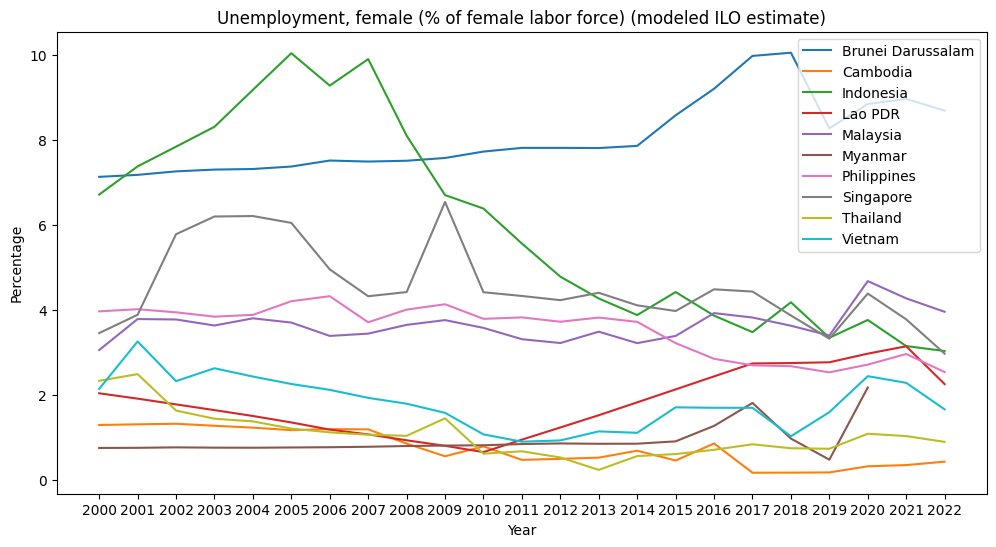

In [ ]:
# Create the line plot
plt.figure(figsize=(12, 6))
for country in pivoted_df.index:
    plt.plot(pivoted_df.loc[country], label=country)
    # plt.scatter(pivoted_df.columns, pivoted_df.loc[country], label='', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Unemployment, female (% of female labor force) (modeled ILO estimate)')
plt.xticks(years_of_interest)
plt.legend(loc='best')
plt.show()